In [1]:
import os,sys,json
from collections import Counter
from itertools import product 
from core.core_utils import *
from core.categories import *
from core.embedvec import load_affiliation_map
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import interpolate
import pandas as pd

In [2]:
CORE_FoR

{4602: 'Artificial intelligence',
 4603: 'Computer vision and multimedia computation',
 4611: 'Machine learning',
 4608: 'Human-centred computing',
 4601: 'Applied computing',
 4612: 'Software engineering',
 4604: 'Cybersecurity and privacy',
 4605: 'Data management and data science',
 4606: 'Distributed computing and systems software',
 4607: 'Graphics, augmented reality and games',
 4609: 'Information systems',
 4610: 'Library and information studies',
 4613: 'Theory of computation',
 4699: 'Other information and computing sciences'}

In [3]:
df = read_core_data()
print("### Field of Research distribution -- CORE 2020 data")
print("Total: {}\n".format(len(df[df["Year"] == "CORE2020"])))
for k, v in CORE_FoR.items():
    conf = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE2020")]
    print(v, len(conf))
#     print(v, len(conf), conf["Acronym"].tolist())

### Field of Research distribution -- CORE 2020 data
Total: 889

Artificial intelligence 128
Computer vision and multimedia computation 41
Machine learning 18
Human-centred computing 54
Applied computing 56
Software engineering 103
Cybersecurity and privacy 77
Data management and data science 63
Distributed computing and systems software 181
Graphics, augmented reality and games 35
Information systems 0
Library and information studies 0
Theory of computation 89
Other information and computing sciences 0


### Field of Research distribution -- CORE 2020 data
Total: 889

** Artificial intelligence 128

Number of papers from 35/128 conferences
# of papers in 2018, 2019 ['EC(83,25)', 'COLT(111,114)', 'NLDB(53,37)', 'IES(113,0)', 'ACL(619,980)', 'AI(0,0)', 'SST(0,0)', 'UAI(119,108)', 'AMTA(47,0)', 'COCOA(50,3)', 'EMNLP(863,1)', 'EACL(0,0)', 'ECAI(1,0)', 'EUROGP(19,18)', 'EURO(125,36)', 'ECSQARU(0,0)', 'EUMAS(17,0)', 'FOGA(0,15)', 'GECCO(482,519)', 'FUZZ-IEEE(243,233)', 'ICRA(1755,1764)', 'AISTATS(214,354)', 'CADE(0,35)', 'ICAPS(62,91)', 'ICCBR(41,27)', 'COLING(491,2)', 'ICARCV(339,0)', 'CP(198,181)', 'KR(93,10)', 'IJCAI(1021,1012)', 'IJCAR(46,0)', 'AAMAS(471,442)', 'IJCNLP(1,727)', 'AAAI(1413,1624)', 'NAACL(689,826)']


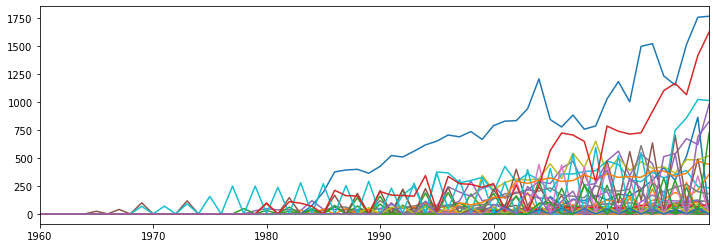

** Computer vision and multimedia computation 41

Number of papers from 9/41 conferences
# of papers in 2018, 2019 ['ACMMM(361,433)', 'ACIVS(52,0)', 'ACCV(309,1)', 'CPM(28,31)', 'DICTA(117,0)', 'ECCV(1112,3)', 'CVPR(1360,1853)', 'ICCV(12,295)', 'WACV(218,231)']


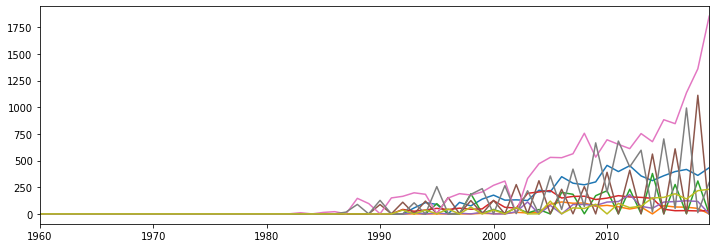

** Machine learning 18

Number of papers from 11/18 conferences
# of papers in 2018, 2019 ['ACML(56,0)', 'NeurIPS(1118,1431)', 'ALT(113,70)', 'SEAL(0,0)', 'CoNLL(61,0)', 'ECML-PKDD(187,9)', 'ESANN(110,7)', 'IJCNN(755,801)', 'ICML(1015,1051)', 'ICONIP(403,1)', 'PPSN(81,0)']


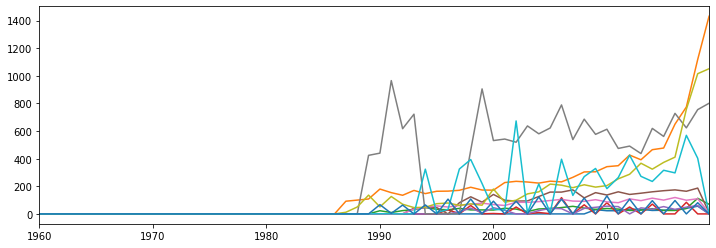

** Human-centred computing 54

Number of papers from 17/54 conferences
# of papers in 2018, 2019 ['CSCW(198,33)', 'SIGITE(88,73)', 'ISS(0,0)', 'UbiComp(847,76)', 'SIGCSE(498,501)', 'UIST(174,149)', 'AVI(96,0)', 'IV-App(0,31)', 'ACE(14,15)', 'OZCHI(5,0)', 'HCI(0,0)', 'CSCL(22,8)', 'VDA(11,0)', 'CDVE(49,32)', 'DIS(196,202)', 'ECSCW(2,1)', 'FIE(533,3)']


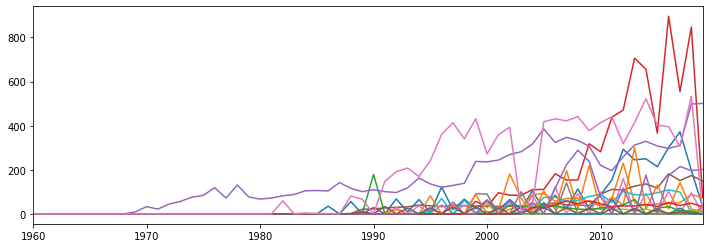

** Applied computing 56

Number of papers from 11/56 conferences
# of papers in 2018, 2019 ['SAC(0,1)', 'AMIA(44,1)', 'ITiCSE(97,137)', 'ACC(1555,957)', 'AIAI(78,71)', 'AIME(0,52)', 'APBC(2,0)', 'BSN(54,42)', 'DNA(0,0)', 'EDM(90,138)', 'ECCB(5,0)']


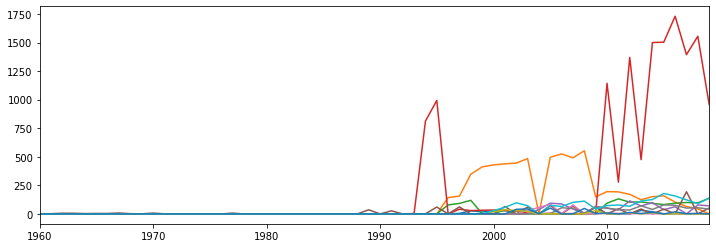

** Software engineering 103

Number of papers from 24/103 conferences
# of papers in 2018, 2019 ['SERA(35,23)', 'OOPSLA(61,2)', 'PEPM(0,0)', 'POPL(61,78)', 'PLDI(61,73)', 'ASPLOS(80,106)', 'APSEC(95,1)', 'APLAS(22,1)', 'ASWEC(0,0)', 'ASE(137,21)', 'AST(71,44)', 'CAV(71,70)', 'XP(0,1)', 'DLS(8,9)', 'EICS(19,7)', 'SEAA(81,4)', 'ECOOP(28,28)', 'EuroPLop(37,0)', 'ECSA(85,66)', 'ESOP(39,28)', 'EMMSAD(0,0)', 'FMCAD(29,0)', 'FDL(20,18)', 'FOSSACS(33,30)']


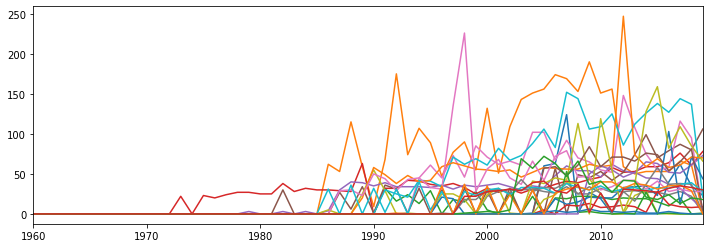

** Cybersecurity and privacy 77

Number of papers from 13/77 conferences
# of papers in 2018, 2019 ['CCS(340,108)', 'SACMAT(29,28)', 'CRYPTO(119,95)', 'ACSAC(62,0)', 'PST(101,4)', 'AsiaCCS(0,2)', 'ACISP(52,40)', 'CISIS(104,92)', 'SCN(1,0)', 'EDCC(30,1)', 'ESORICS(57,68)', 'FC(54,38)', 'SAC(0,1)']


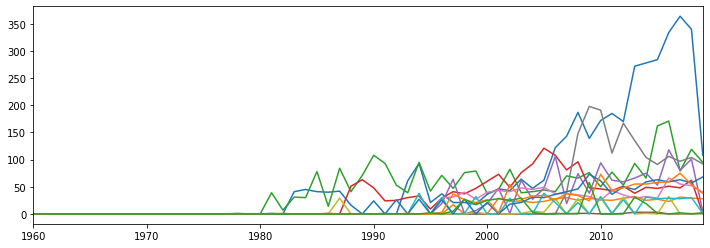

** Data management and data science 63

Number of papers from 23/63 conferences
# of papers in 2018, 2019 ['CIKM(314,1)', 'KDD(338,395)', 'RecSys(179,182)', 'SIGIR(363,380)', 'WSDM(124,137)', 'PODS(36,36)', 'SIGMOD(283,253)', 'DocEng(52,41)', 'AIRS(20,0)', 'APCCM(0,0)', 'ADC(32,10)', 'ADCS(13,0)', 'AusDM(30,0)', 'FAST(23,26)', 'CIDR(7,43)', 'DCC(83,121)', 'DaWaK(1,21)', 'DBPL(0,10)', 'ECIR(84,120)', 'EJC(0,0)', 'ESWC(4,0)', 'EDBT(96,91)', 'FQAS(0,37)']


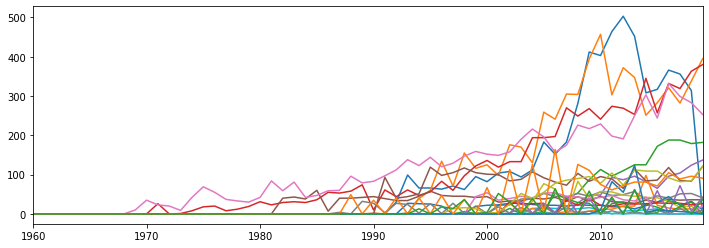

** Distributed computing and systems software 181

Number of papers from 33/181 conferences
# of papers in 2018, 2019 ['ANT(3,0)', 'SIGCOMM(210,145)', 'SENSYS(88,0)', 'EMSOFT(32,1)', 'CoNEXT(31,0)', 'MOBICOM(138,106)', 'ICS(151,109)', 'HPDC(34,31)', 'IWCMC(264,359)', 'Mobisys(80,150)', 'SOSP(0,38)', 'LCTES(12,22)', 'PADS(25,20)', 'MOBIHOC(61,78)', 'PODC(81,78)', 'HOTNETS(26,0)', 'ICDSC(28,36)', 'MSWIM(49,0)', 'Middleware(0,0)', 'ACSD(14,11)', 'APCC(115,0)', 'APNOMS(0,0)', 'APSCC(0,0)', 'CISS(111,113)', 'SOFTCOM(81,1)', 'DAC(309,262)', 'DATE(315,332)', 'EATIS(47,0)', 'ECRTS(28,26)', 'PDP(115,62)', 'AmI(169,353)', 'EuroSys(69,65)', 'CISIS(104,92)']


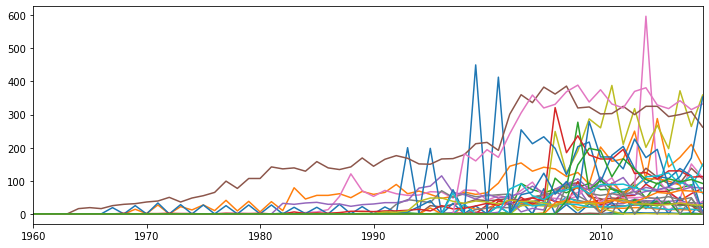

** Graphics, augmented reality and games 35

Number of papers from 10/35 conferences
# of papers in 2018, 2019 ['ACE(14,15)', 'SIGGRAPH(705,308)', 'SCA(1,10)', 'SPM(0,0)', 'VRST(133,0)', 'ArtsIT(13,1)', 'CGI(36,58)', 'DIGRA(19,9)', 'Euro VR(284,489)', 'EGPGV(10,12)']


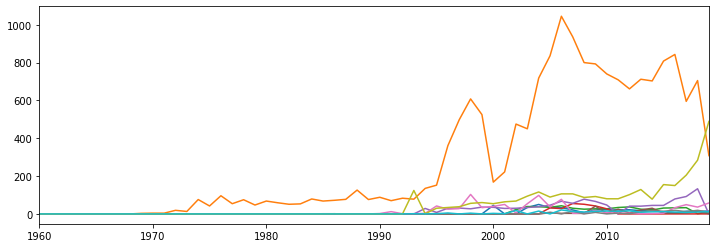

** Information systems 0

Number of papers from 0/0 conferences
# of papers in 2018, 2019 []
** Library and information studies 0

Number of papers from 0/0 conferences
# of papers in 2018, 2019 []
** Theory of computation 89

Number of papers from 18/89 conferences
# of papers in 2018, 2019 ['STOC(113,113)', 'SODA(220,204)', 'AiML(37,0)', 'WADS(2,39)', 'CSL(56,12)', 'CTW(4,2)', 'CiE(61,25)', 'AAIM(25,32)', 'FUN(33,0)', 'IPCO(1,33)', 'ITP(38,4)', 'TAMC(0,43)', 'DLT(45,25)', 'DS(116,62)', 'ECCO(13,14)', 'ESA(140,110)', 'EuroCG(8,0)', 'FST&TCS(0,0)']


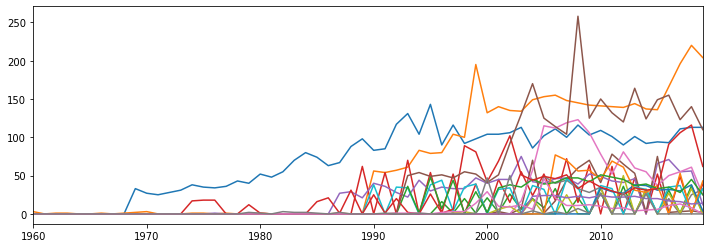

** Other information and computing sciences 0

Number of papers from 0/0 conferences
# of papers in 2018, 2019 []


In [4]:
df = read_core_data()
print("### Field of Research distribution -- CORE 2020 data")
print("Total: {}\n".format(len(df[df["Year"] == "CORE2020"])))
year = range(1960,2020,1)
for k, v in CORE_FoR.items():
    conf = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE2020")]
    print("**", v, len(conf))
    confinfo = load_conf_paper(conf["Acronym"].tolist())
    
#     data = {cc:[value["yearcounter"][y] for y in year] for cc, value in confinfo.items()}
    data = {cc:[value["yearcounter"][y] for y in year] for cc, value in confinfo.items() if value}
    available_conference = data.keys()
    print()
    print("Number of papers from {}/{} conferences".format(len(available_conference), len(conf)))
    print("# of papers in 2018, 2019", ["{}({},{})".format(c,data[c][-2],data[c][-1]) for c in available_conference])
    
    if len(available_conference) == 0: continue

    plotdf = pd.DataFrame(data, year)
    ax = plotdf.plot(figsize=(12,4), legend=False)
    plt.show()
    

### Field of Research distribution -- CORE 2020 data
Total: 889

** Artificial intelligence 128


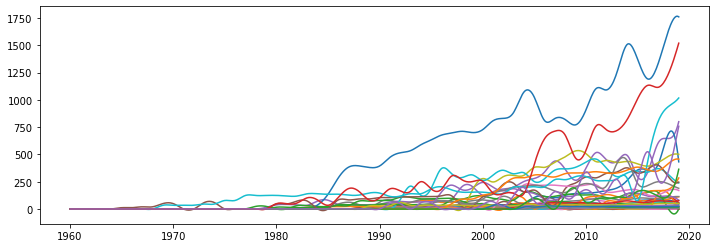

** Computer vision and multimedia computation 41


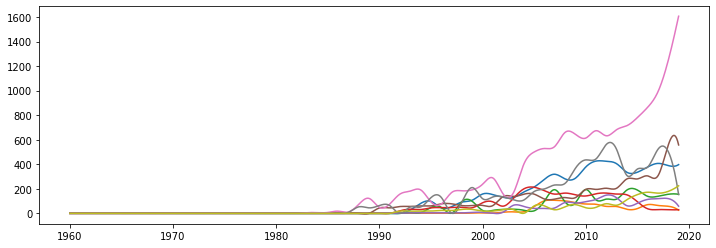

** Machine learning 18


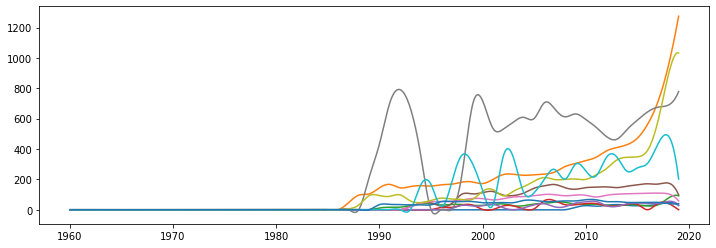

** Human-centred computing 54


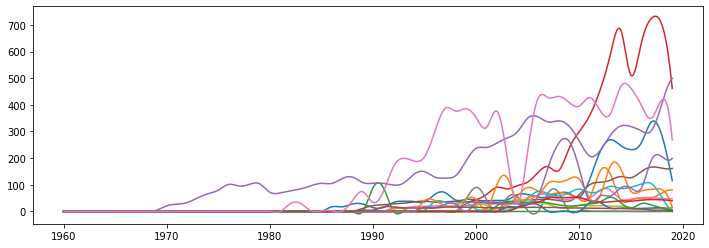

** Applied computing 56


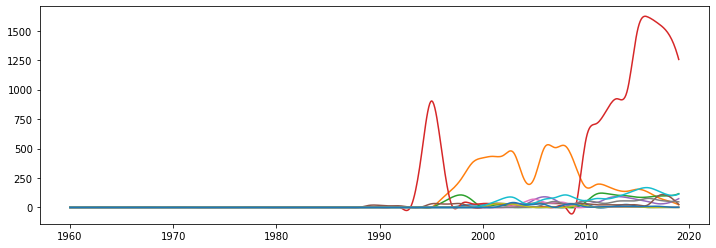

** Software engineering 103


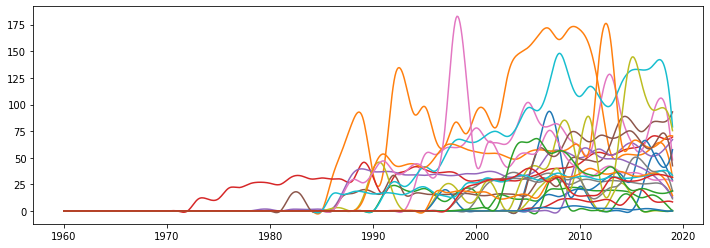

** Cybersecurity and privacy 77


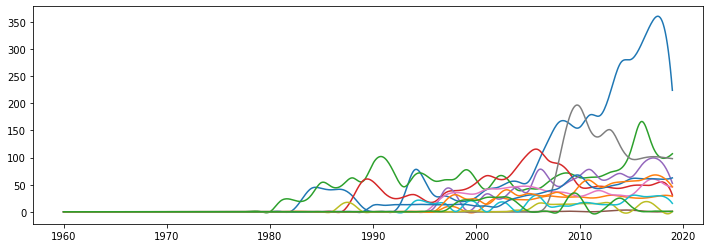

** Data management and data science 63


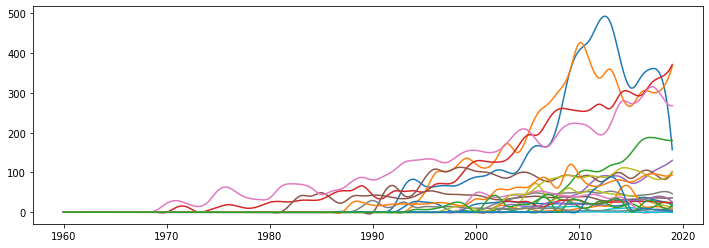

** Distributed computing and systems software 181


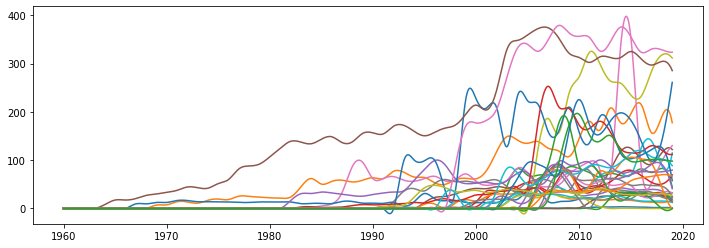

** Graphics, augmented reality and games 35


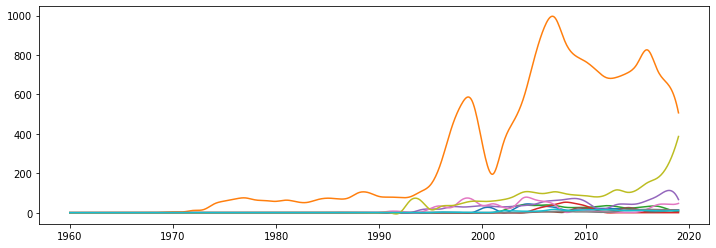

** Information systems 0


<Figure size 864x288 with 0 Axes>

** Library and information studies 0


<Figure size 864x288 with 0 Axes>

** Theory of computation 89


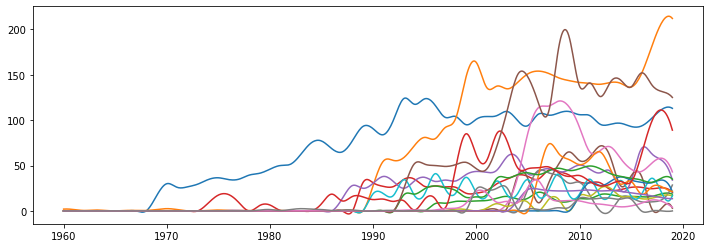

** Other information and computing sciences 0


<Figure size 864x288 with 0 Axes>

In [5]:
df = read_core_data()
print("### Field of Research distribution -- CORE 2020 data")
print("Total: {}\n".format(len(df[df["Year"] == "CORE2020"])))
year = range(1960,2020,1)
x_val = np.linspace(1960,2019,600)
for k, v in CORE_FoR.items():
    conf = df.loc[(df["FoR1"] == k) & (df["Year"] == "CORE2020")]
    print("**", v, len(conf))
    confinfo = load_conf_paper(conf["Acronym"].tolist())
    
    data = {}
    plt.figure(figsize=(12,4))
    for cc, value in confinfo.items():
        if not value: continue
#         y_val = [value["yearcounter"][y] for y in year]
        y_val = [(value["yearcounter"][y]+value["yearcounter"][y-1])/2 for y in year] # average of 2 years window
        a_BSpline = interpolate.make_interp_spline(year, y_val)
        new_y = a_BSpline(x_val)
        plt.plot(x_val, new_y)
    plt.show()

# Examples

/Users/minjeongshin/miniconda2/envs/mm/lib/python3.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


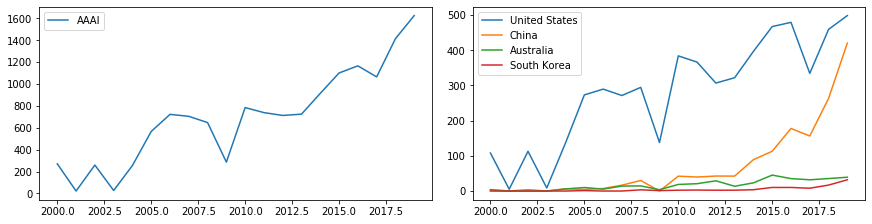

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:A', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


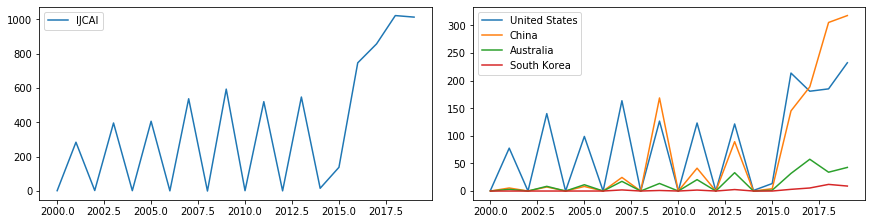

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:A', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:A', '2018:A']


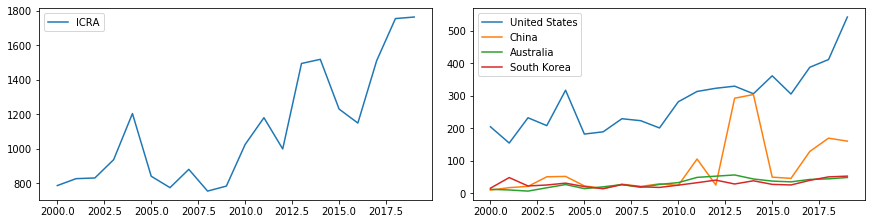

CORE: ['2008:B', '2013:B', '2014:B', '2017:B', '2018:B', '2020:B']
CCF: ['2012:B', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:A', '2018:A']


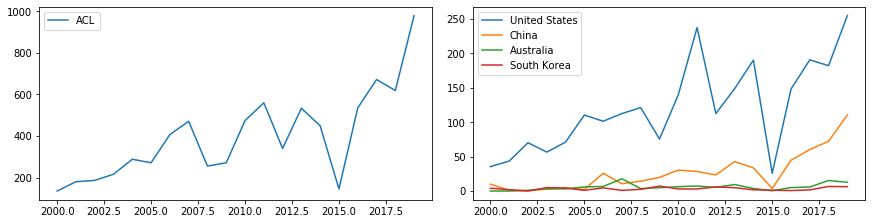

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:B', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


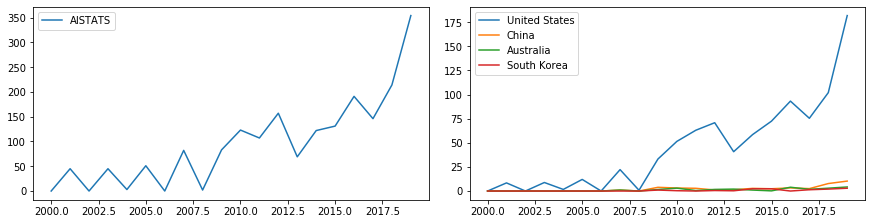

CORE: ['2013:B', '2014:A', '2017:A', '2018:A', '2020:A']
CCF: ['2015:C', '2019:C']
KIISE: ['2014:A', '2016:A', '2018:A']


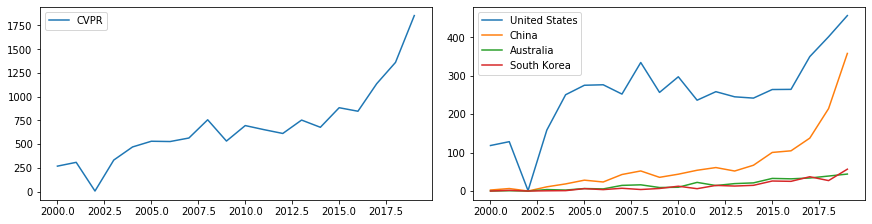

CORE: ['2008:A', '2013:A', '2014:A', '2017:A', '2018:A*', '2020:A*']
CCF: ['2012:A', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


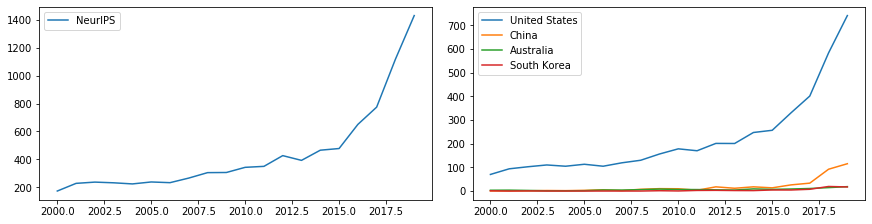

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:B', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


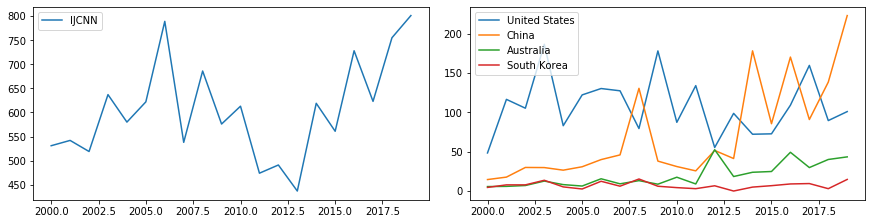

CORE: ['2008:A', '2013:A', '2014:A', '2017:A', '2018:A', '2020:A']
CCF: ['2012:C', '2015:C', '2019:C']
KIISE: []


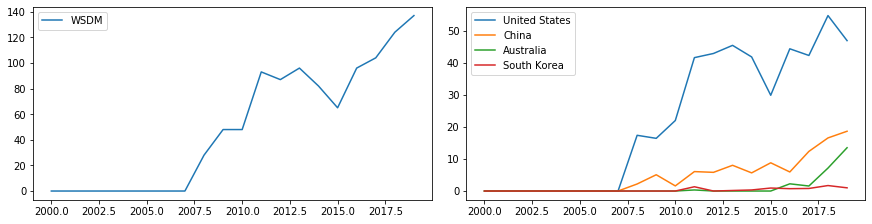

CORE: ['2013:B', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:C', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:A', '2018:A']


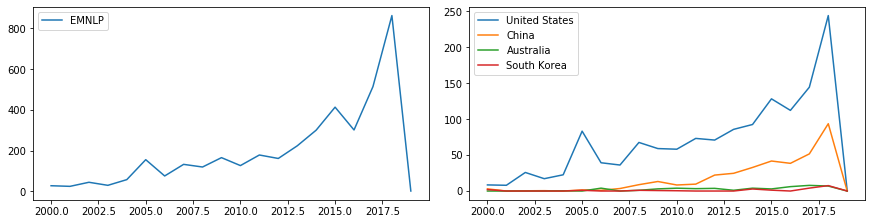

CORE: ['2008:A', '2013:A', '2014:A', '2017:A', '2018:A', '2020:A']
CCF: ['2012:B', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:S', '2018:S']


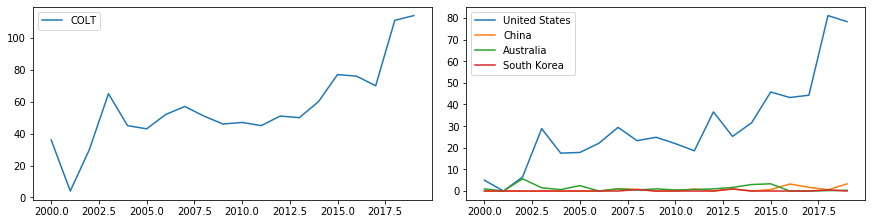

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:B', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:A', '2018:A']


In [6]:
ex_list = ["AAAI", "IJCAI", "ICRA", "ACL", "AISTATS", "CVPR", "NeurIPS", "IJCNN", "WSDM", "EMNLP", "COLT"]
countries = ["United States", "China", "Australia", "South Korea"]
year = range(2000,2020,1)
confinfo = load_conf_paper(ex_list)

core_df = read_core_data()
ccf_df = read_ccf_fos_data()
kiise_df = read_kiise_fos_data()

for cc, value in confinfo.items():
    data = [value["yearcounter"][y] for y in year]
    fig, axes = plt.subplots(1, 2, figsize=(12,3), constrained_layout=True)
    conf_ax, country_ax = axes
    conf_ax.plot(year, data, label=cc)
    conf_ax.legend(loc="upper left")
    
    c_data = {}
    for c in countries:
        c_data[c] = []
        for y in year:
            if str(y) not in value["paa"] or c not in value["paa"][str(y)]["Countries"]:
                c_data[c].append(0)
            else:
                c_data[c].append(value["paa"][str(y)]["Countries"][c])
        country_ax.plot(year, c_data[c], label=c)
    country_ax.legend(loc="upper left")
    plt.show()
    
    # CORE [2020, 2018, 2017, 2014, 2013, (ERA2010), 2018], Rank: A*, A, B, C
    core_y = [2008, 2013, 2014, 2017, 2018, 2020]
    data = {v[0]:v[1] for v in core_df.loc[core_df["Acronym"] == cc][["Year", "Rank"]].values.tolist()}
    print("CORE:", ["{}:{}".format(y,data["CORE{}".format(y)]) for y in core_y if "CORE{}".format(y) in data])
    
    # CCF [2019, 2015, 2012], Rank: A, B, C
    ccf_y = [2012, 2015, 2019]
    data2 = {v[0]:v[1] for v in ccf_df.loc[ccf_df["Acronym"] == cc][["Year", "Rank"]].values.tolist()}
    print("CCF:", ["{}:{}".format(y,data2[y]) for y in ccf_y if y in data2])
    
    # KIISE [2014, 2016, 2018], Rank: S, A
    kiise_y = [2014, 2016, 2018]
    data3 = {v[0]:v[1] for v in kiise_df.loc[kiise_df["Acronym"] == cc][["Year", "Rank"]].values.tolist()}
    print("KIISE:", ["{}:{}".format(y,data3[y]) for y in kiise_y if y in data3])

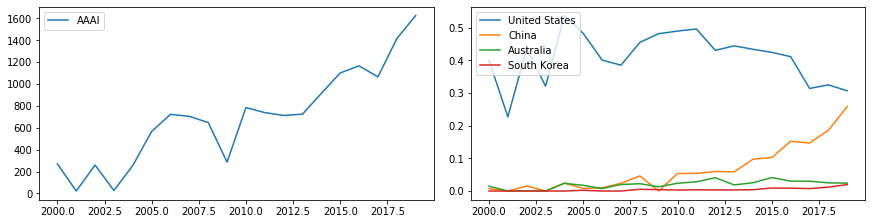

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:A', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


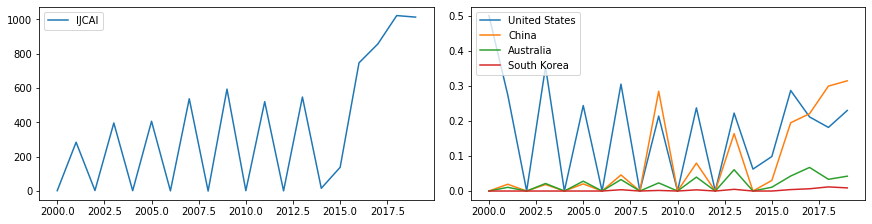

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:A', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:A', '2018:A']


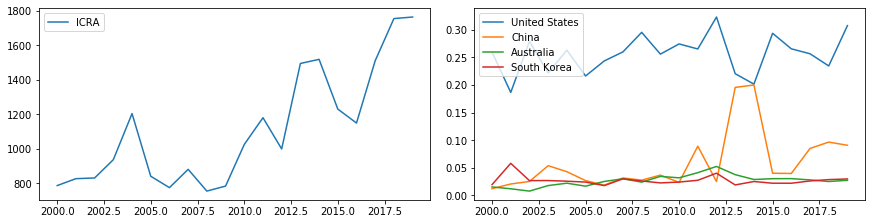

CORE: ['2008:B', '2013:B', '2014:B', '2017:B', '2018:B', '2020:B']
CCF: ['2012:B', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:A', '2018:A']


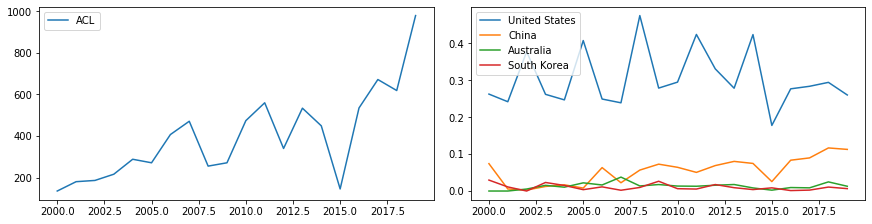

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:B', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


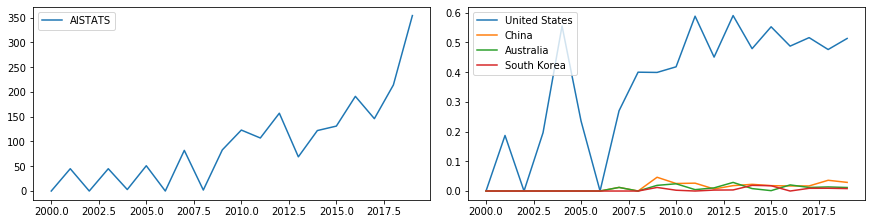

CORE: ['2013:B', '2014:A', '2017:A', '2018:A', '2020:A']
CCF: ['2015:C', '2019:C']
KIISE: ['2014:A', '2016:A', '2018:A']


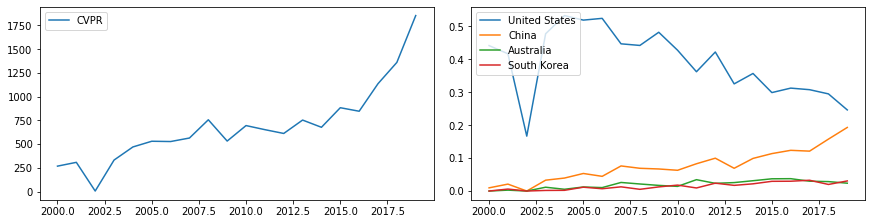

CORE: ['2008:A', '2013:A', '2014:A', '2017:A', '2018:A*', '2020:A*']
CCF: ['2012:A', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


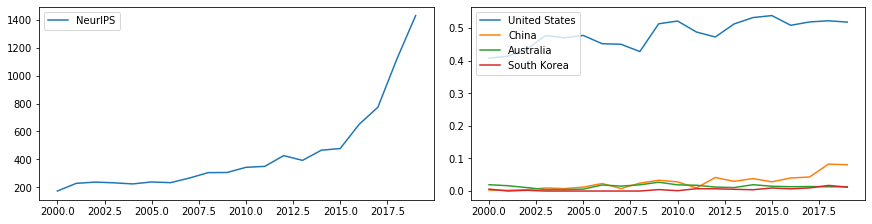

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:B', '2015:A', '2019:A']
KIISE: ['2014:S', '2016:S', '2018:S']


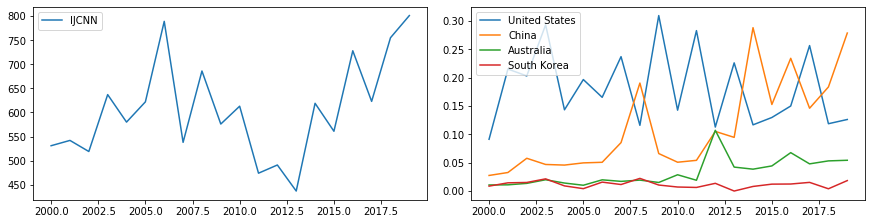

CORE: ['2008:A', '2013:A', '2014:A', '2017:A', '2018:A', '2020:A']
CCF: ['2012:C', '2015:C', '2019:C']
KIISE: []


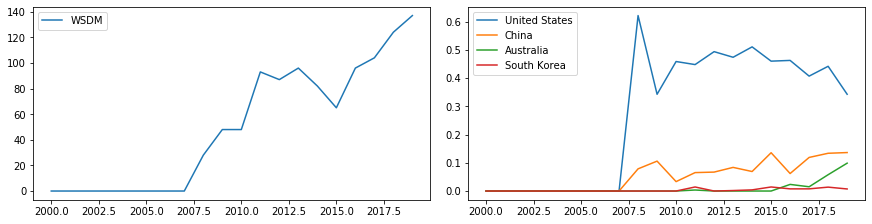

CORE: ['2013:B', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:C', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:A', '2018:A']


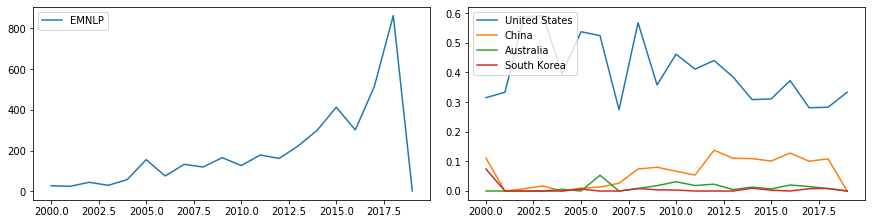

CORE: ['2008:A', '2013:A', '2014:A', '2017:A', '2018:A', '2020:A']
CCF: ['2012:B', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:S', '2018:S']


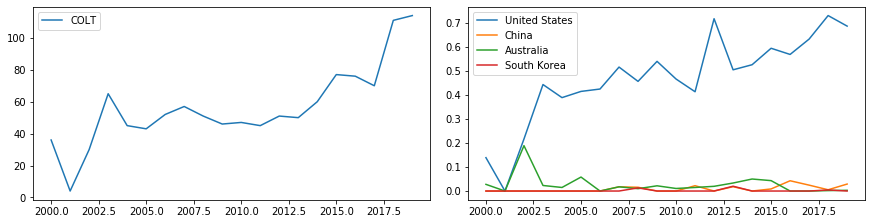

CORE: ['2008:A*', '2013:A*', '2014:A*', '2017:A*', '2018:A*', '2020:A*']
CCF: ['2012:B', '2015:B', '2019:B']
KIISE: ['2014:A', '2016:A', '2018:A']


In [8]:
ex_list = ["AAAI", "IJCAI", "ICRA", "ACL", "AISTATS", "CVPR", "NeurIPS", "IJCNN", "WSDM", "EMNLP", "COLT"]
countries = ["United States", "China", "Australia", "South Korea"]
year = range(2000,2020,1)
confinfo = load_conf_paper(ex_list)

core_df = read_core_data()
ccf_df = read_ccf_fos_data()
kiise_df = read_kiise_fos_data()

for cc, value in confinfo.items():
    data = [value["yearcounter"][y] for y in year]
    fig, axes = plt.subplots(1, 2, figsize=(12,3), constrained_layout=True)
    conf_ax, country_ax = axes
    conf_ax.plot(year, data, label=cc)
    conf_ax.legend(loc="upper left")
    
    c_data = {}
    for c in countries:
        c_data[c] = []
        for y, total in zip(year, data):
            if str(y) not in value["paa"] or c not in value["paa"][str(y)]["Countries"]:
                c_data[c].append(0)
            else:
                c_data[c].append(value["paa"][str(y)]["Countries"][c]/total)
        country_ax.plot(year, c_data[c], label=c)
    country_ax.legend(loc="upper left")
    plt.show()
    
    # CORE [2020, 2018, 2017, 2014, 2013, (ERA2010), 2018], Rank: A*, A, B, C
    core_y = [2008, 2013, 2014, 2017, 2018, 2020]
    data = {v[0]:v[1] for v in core_df.loc[core_df["Acronym"] == cc][["Year", "Rank"]].values.tolist()}
    print("CORE:", ["{}:{}".format(y,data["CORE{}".format(y)]) for y in core_y if "CORE{}".format(y) in data])
    
    # CCF [2019, 2015, 2012], Rank: A, B, C
    ccf_y = [2012, 2015, 2019]
    data2 = {v[0]:v[1] for v in ccf_df.loc[ccf_df["Acronym"] == cc][["Year", "Rank"]].values.tolist()}
    print("CCF:", ["{}:{}".format(y,data2[y]) for y in ccf_y if y in data2])
    
    # KIISE [2014, 2016, 2018], Rank: S, A
    kiise_y = [2014, 2016, 2018]
    data3 = {v[0]:v[1] for v in kiise_df.loc[kiise_df["Acronym"] == cc][["Year", "Rank"]].values.tolist()}
    print("KIISE:", ["{}:{}".format(y,data3[y]) for y in kiise_y if y in data3])

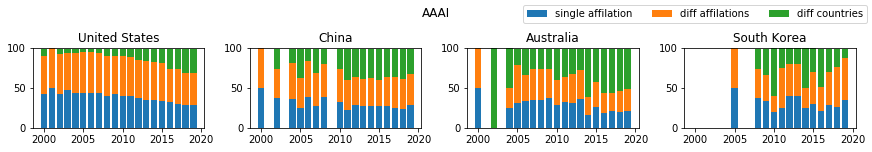

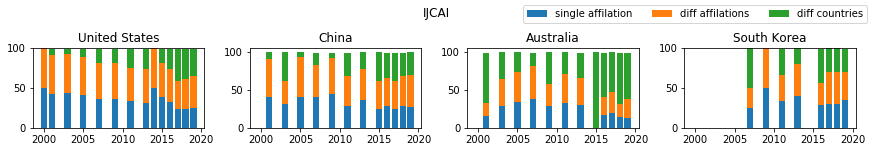

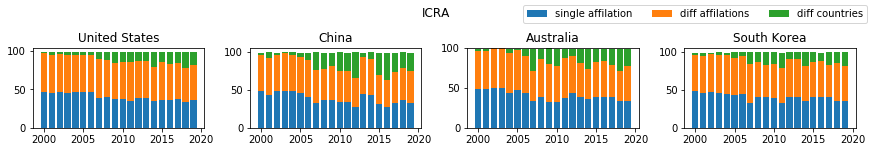

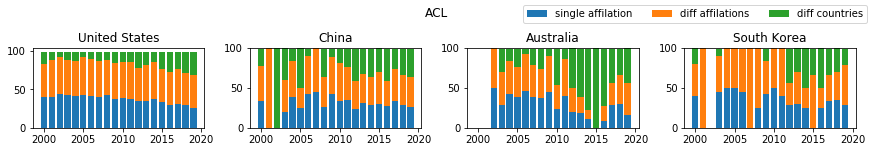

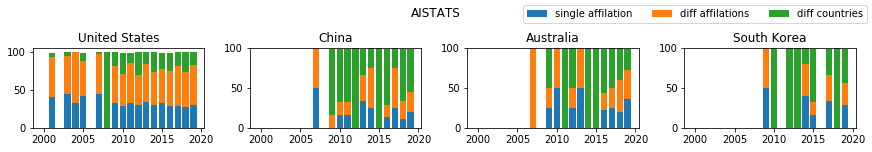

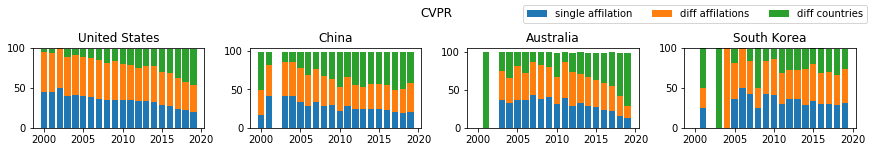

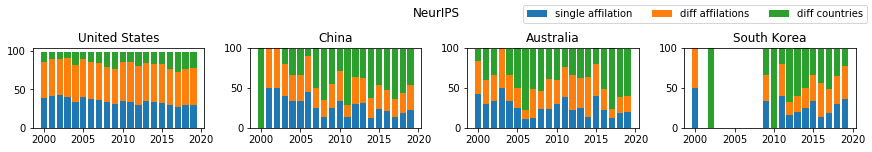

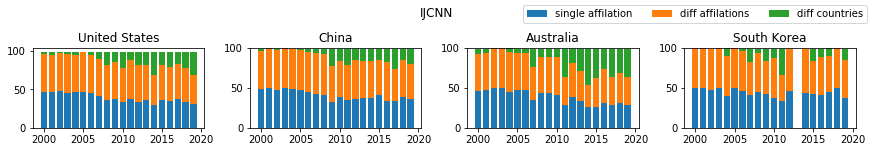

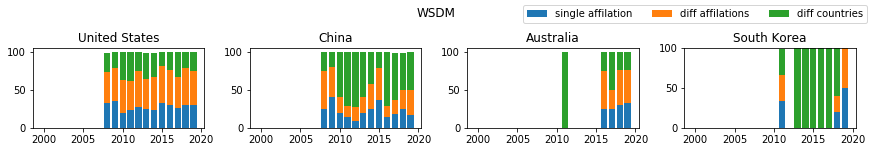

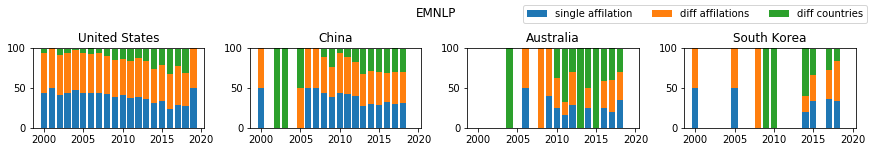

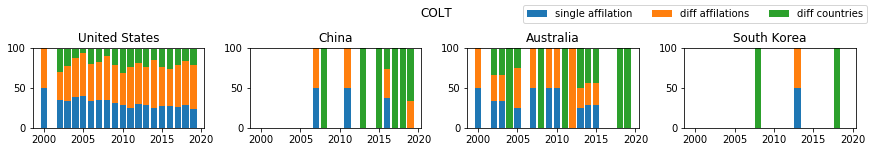

In [7]:
ex_list = ["AAAI", "IJCAI", "ICRA", "ACL", "AISTATS", "CVPR", "NeurIPS", "IJCNN", "WSDM", "EMNLP", "COLT"]
countries = ["United States", "China", "Australia", "South Korea"]
year = range(2000,2020,1)
confinfo = load_conf_paper(ex_list)
Affilation_Map = load_affiliation_map()

for cc, value in confinfo.items():    
    c_data = {}
    fig, axes = plt.subplots(1, len(countries), figsize=(12,2), constrained_layout=True)
    fig.suptitle(cc)
    for i, c in enumerate(countries):
        c_data[c] = []
        l_single_aff = []
        l_diff_aff = []
        l_diff_country = []
        for y in year:
            papers = value["paa"][str(y)]["PAA"]
            single_aff = 0
            diff_aff = 0
            diff_country = 0
            for p, aff in papers.items():
                data = [(Affilation_Map[affid],v) for affid, v in aff.items()]
                if c not in [d[0] for d in data]: continue
                if len(data) == 1: # single affilation from country c
                    single_aff += 1
                if len(set([d[0] for d in data])) == 1: # multiple affilations from the same country c
                    diff_aff += 1
                else:
                    diff_country += 1
            total_c = single_aff+diff_aff+diff_country
            l_single_aff.append(int(100*single_aff/total_c) if total_c > 0 else 0)
            l_diff_aff.append(int(100*diff_aff/total_c) if total_c > 0 else 0)
            l_diff_country.append(int(100*diff_country/total_c) if total_c > 0 else 0)
#             print("{}: {}/{}\t-- same aff: {} ({}%), diff aff: {} ({}%), diff country: {} ({}%)"
#                   .format(y, total_c, len(papers), single_aff, int(100*single_aff/total_c) if total_c > 0 else 0, 
#                           diff_aff, int(100*diff_aff/total_c) if total_c > 0 else 0, 
#                           diff_country, int(100*diff_country/total_c) if total_c > 0 else 0))
        axes[i].bar(year, l_single_aff, label="single affilation")
        axes[i].bar(year, l_diff_aff, bottom=l_single_aff, label="diff affilations")
        axes[i].bar(year, l_diff_country, bottom=[i+j for i,j in zip(l_single_aff, l_diff_aff)], label="diff countries")
        axes[i].set_title(c)
    handles, labels = axes[len(countries)-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", ncol=3)
    plt.show()